In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def download_data(path): 
  data = []
  for path_image in sorted(os.listdir(path=path)): 
    image = Image.open(path + path_image)
    data.append(np.array(image))
  return data

In [4]:
X_train = download_data(r"./drive/MyDrive/data/train/image/")
Y_train = download_data(r"./drive/MyDrive/data/train/label/")
X_test = download_data(r"./drive/MyDrive/data/test/image/")
Y_test = download_data(r"./drive/MyDrive/data/test/label/")

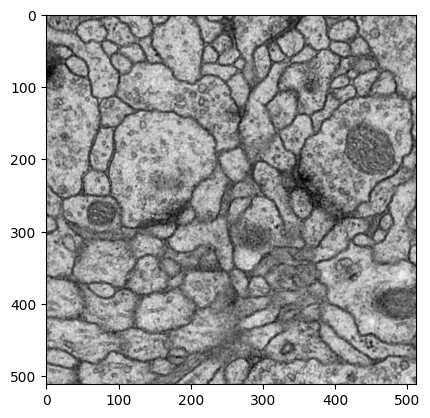

In [5]:
I=0
plt.imshow(X_train[I], cmap='gray')

In [6]:
X_train_pred = np.array(X_train).reshape([30, 512, 512, 1])/255
Y_train_pred = np.array(Y_train).reshape([30, 512, 512, 1])/255

X_test_pred = np.array(X_test).reshape([30, 512, 512, 1])/255 
Y_test_pred = np.array(Y_test).reshape([30, 512, 512, 1])/255

In [7]:
model = Sequential()
model.add(Conv2D(64, 5, input_shape=[512, 512, 1], activation = 'relu', padding ='same'))
model.add(Conv2D(64, 5, activation = 'relu', padding ='same'))
model.add(Conv2D(64, 5, activation = 'relu', padding ='same')) 
model.add(Conv2D(64, 5, activation = 'relu', padding ='same'))
model.add(Conv2D(1, 1, activation = 'sigmoid'))
model.compile(optimizer = Adam(), loss = 'mse')

In [8]:
model.fit(X_train_pred , Y_train_pred , epochs=15, batch_size=1)

Epoch 1/15
30/30 [==============================] - 13s 110ms/step - loss: 0.1563
Epoch 2/15
30/30 [==============================] - 3s 111ms/step - loss: 0.1199
Epoch 3/15
30/30 [==============================] - 3s 111ms/step - loss: 0.1133
Epoch 4/15
30/30 [==============================] - 3s 111ms/step - loss: 0.1136
Epoch 5/15
30/30 [==============================] - 3s 112ms/step - loss: 0.1016
Epoch 6/15
30/30 [==============================] - 3s 112ms/step - loss: 0.0977
Epoch 7/15
30/30 [==============================] - 3s 114ms/step - loss: 0.0944
Epoch 8/15
30/30 [==============================] - 3s 113ms/step - loss: 0.0973
Epoch 9/15
30/30 [==============================] - 3s 113ms/step - loss: 0.0920
Epoch 10/15
30/30 [==============================] - 3s 114ms/step - loss: 0.0880
Epoch 11/15
30/30 [==============================] - 3s 115ms/step - loss: 0.0874
Epoch 12/15
30/30 [==============================] - 3s 115ms/step - loss: 0.0863
Epoch 13/15
30/30 [=====

In [9]:
print("MSE: ", model.evaluate(X_test_pred , Y_test_pred , batch_size=1))

30/30 [==============================] - 1s 37ms/step - loss: 0.1831
MSE:  0.18305370211601257


In [10]:
out = model.predict(X_test_pred , batch_size=1)

30/30 [==============================] - 1s 35ms/step


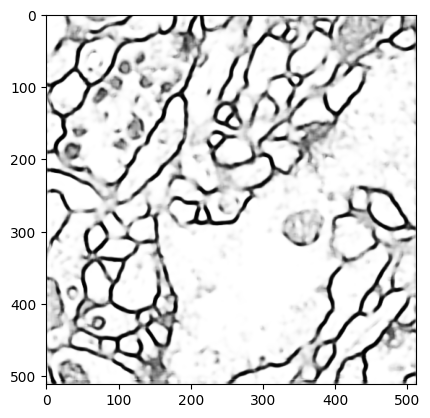

In [11]:
I=0
plt.imshow(out[I].reshape([512, 512]), cmap='gray')

| Количество слоев | Количество эпох |  batch_size | MSE | 
|----------|----------|----------|----------|
| 5    | 15   | 1   | 0.1889   |
| 5    | 15   | 2   | 0.2039   |
| 5    | 15   | 10  | 0.2156   |
| 5    | 30   | 1   | 0.2249   |
| 5    | 30   | 2   | 0.2082   |
| 5    | 30   | 10  | 0.2166   |
| 3    | 15   | 1   | 0.1696   |
| 3    | 15   | 2   | 0.1764   |
| 3    | 15   | 10  | 0.1813   |
| 3    | 30   | 1   | 0.1718   |
| 3    | 30   | 2   | 0.1797   |
| 3    | 30   | 10  | 0.1832   |
| 7    | 15   | 1   | 0.2064   |
| 7    | 15   | 2   | 0.2018   |
| 7    | 15   | 10  | 0.2201   |
| 7    | 15   | 1   | 0.2235   |
| 7    | 30   | 2   | 0.2276   |
| 7    | 30   | 10  | 0.2289   |
| 2    | 15   | 1   | 0.1511   |
| 2    | 10   | 1   | 0.1654   |
| 2    | 5    | 1   | 0.1608   |
| 2    | 1    | 1   | 0.1662   |
| 2    | 30   | 1   | 0.1661   |
| 2    | 100  | 1   | 0.1651   |

